### Engineering Placements Prediction
### Predict Final Year Engineering College Placements

A University Announced Its On-Campus Placement Records For The Engineering Course. The Data Is From The Years 2013 And 2014.
The Following Is The College Placements Data Compiled Over 2 years. **Use This Data To Predict And Analyse Whether A Student Gets Placed**, Based On His/Her Background.
Perform Extensive EDAs And Bring Out Insights.
Build classification model using various ML techniques
##### Kaggle URL: https://www.kaggle.com/tejashvi14/engineering-placements-prediction?select=collegePlace.csv
##### Dataset: kaggle datasets download -d tejashvi14/engineering-placements-prediction

In [8]:
# importing basic packages
import pandas as pd
import numpy as np

In [9]:
# Reading data
df = pd.read_csv('data.csv')
df.head().T

,0,1,2,3,4
Age,22,21,22,21,22
Gender,Male,Female,Female,Male,Male
Stream,Electronics And Communication,Computer Science,Information Technology,Information Technology,Mechanical
Internships,1,0,1,0,0
CGPA,8,7,6,8,8
Hostel,1,1,0,0,1
HistoryOfBacklogs,1,1,0,1,0
PlacedOrNot,1,1,1,1,1


## Data preparation

In [10]:
# Make column names to lower and replace space with underscore if any
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [12]:
# Display first 5 records and transpose for better readability
df.head().T

,0,1,2,3,4
age,22,21,22,21,22
gender,Male,Female,Female,Male,Male
stream,Electronics And Communication,Computer Science,Information Technology,Information Technology,Mechanical
internships,1,0,1,0,0
cgpa,8,7,6,8,8
hostel,1,1,0,0,1
historyofbacklogs,1,1,0,1,0
placedornot,1,1,1,1,1


In [13]:
# Create a list of categorical variables
categorical_variables = list(df.dtypes[df.dtypes == 'object'].index)
categorical_variables

['gender', 'stream']

In [14]:
# Make values in a categorical variables to lower and repalce space with underscore if any
for col in categorical_variables:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [15]:
# Display first 5 records and transpose for better readability
df.head().T

,0,1,2,3,4
age,22,21,22,21,22
gender,male,female,female,male,male
stream,electronics_and_communication,computer_science,information_technology,information_technology,mechanical
internships,1,0,1,0,0
cgpa,8,7,6,8,8
hostel,1,1,0,0,1
historyofbacklogs,1,1,0,1,0
placedornot,1,1,1,1,1


In [18]:
# Descriptive statistics
# Check count measure to detect if there is any missing values - **No missing values detected**
# Check max to see any abnormal values - **No abnormal values detected**
df.describe()

,age,internships,cgpa,hostel,historyofbacklogs,placedornot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis

In [19]:
# import matplot and seaborn viusalization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

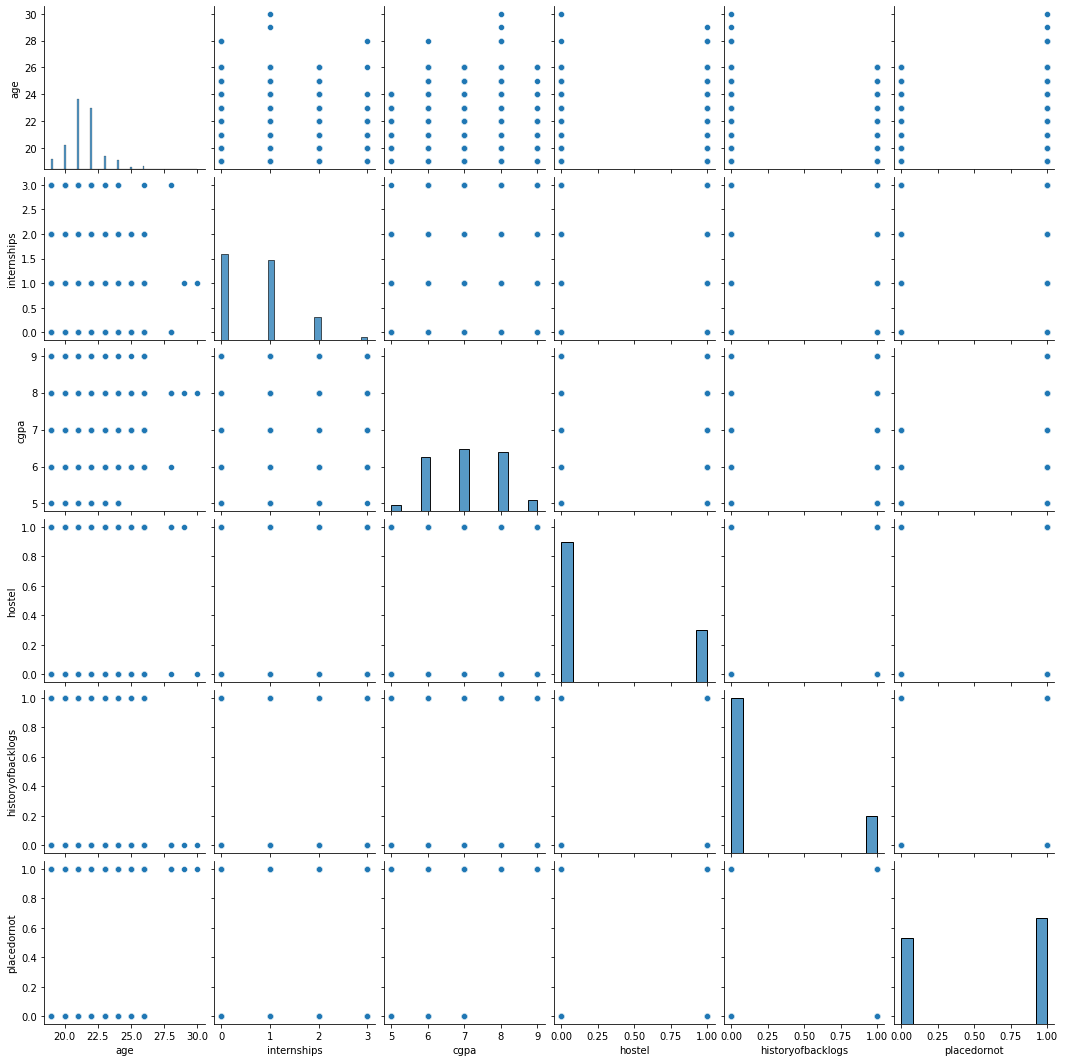

In [21]:
# Plot pairwise relationships in a dataset.
sns.pairplot(df)

<AxesSubplot:xlabel='age', ylabel='Count'>

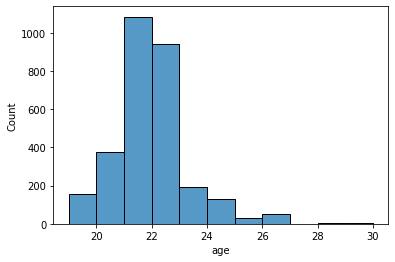

In [51]:
# age histogram
sns.histplot(df['age'], binwidth=1)

<AxesSubplot:xlabel='internships', ylabel='Count'>

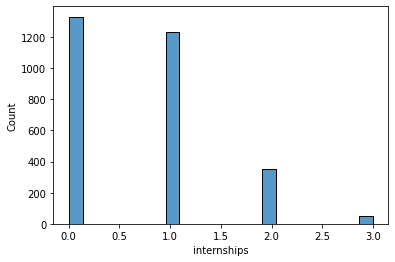

In [49]:
# internships distribution
sns.histplot(df['internships'])

7    956
8    915
6    834
9    165
5     96
Name: cgpa, dtype: int64

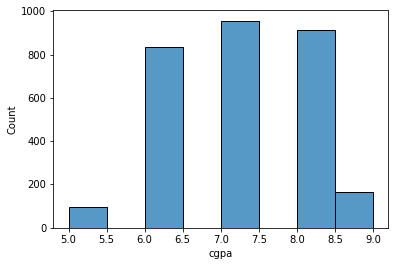

In [62]:
# fig = plt.figure(figsize=(5, 5))
# cgpa distribution
sns.histplot(df['cgpa'], binwidth=0.5)
df['cgpa'].value_counts()

0    0.730951
1    0.269049
Name: hostel, dtype: float64

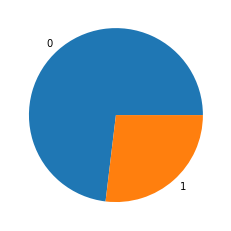

In [81]:
# hostel distribution
plt.pie(df['hostel'].value_counts(), labels=df['hostel'].value_counts().index)
df['hostel'].value_counts(normalize=True)

0    0.807822
1    0.192178
Name: historyofbacklogs, dtype: float64

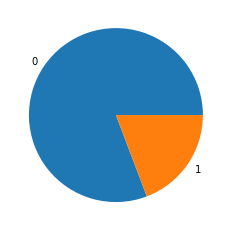

In [80]:
# historyofbacklogs distribution
plt.pie(df['historyofbacklogs'].value_counts(), labels=df['historyofbacklogs'].value_counts().index)
df['historyofbacklogs'].value_counts(normalize=True)

1    0.552596
0    0.447404
Name: placedornot, dtype: float64

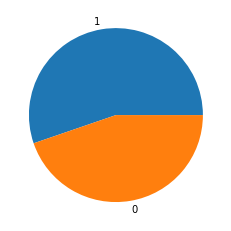

In [83]:
# placedornot distribution
plt.pie(df['placedornot'].value_counts(), labels=df['placedornot'].value_counts().index)
df['placedornot'].value_counts(normalize=True)

## Setting up the validation framework

In [85]:
from sklearn.model_selection import train_test_split

In [87]:
#splitting train, val, test set
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.placedornot.values
y_val = df_val.placedornot.values
y_test = df_test.placedornot.values

del df_train['placedornot']
del df_val['placedornot']
del df_test['placedornot']

len(df_train), len(df_val), len(df_test)

(1779, 593, 594)

In [88]:
# ratio of female students placed
placed_female = df_full_train[df_full_train.gender == 'female'].placedornot.mean()
placed_female

0.5607235142118863

In [90]:
# ratio of male students placed
placed_male = df_full_train[df_full_train.gender == 'male'].placedornot.mean()
placed_male

0.5496221662468513

In [91]:
# ratio of overall placed
global_placed = df_full_train.placedornot.mean()
global_placed

0.551433389544688

In [92]:
from IPython.display import display

In [95]:
# check placed ratio for categorical variable
for c in categorical_variables:
    print(c)
    df_group = df_full_train.groupby(c).placedornot.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_placed
    df_group['placed'] = df_group['mean'] / global_placed
    display(df_group)
    print()
    print()

gender


,mean,count,diff,placed
gender,,,,
female,0.560724,387,0.009290,1.016847
male,0.549622,1985,-0.001811,0.996715




stream


,mean,count,diff,placed
stream,,,,
civil,0.457143,245,-0.094291,0.829008
computer_science,0.587948,614,0.036514,1.066217
electrical,0.537906,277,-0.013527,0.975469
electronics_and_communication,0.586705,346,0.035272,1.063964
information_technology,0.591800,561,0.040367,1.073204
mechanical,0.458967,329,-0.092467,0.832316


## Feature importance: Mutual information
Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

https://en.wikipedia.org/wiki/Mutual_information

In [96]:
from sklearn.metrics import mutual_info_score

In [97]:
def mutual_info_placed_score(series):
    return mutual_info_score(series, df_full_train.placedornot)

In [99]:
mi = df_full_train[categorical_variables].apply(mutual_info_placed_score)
mi.sort_values(ascending=False)

stream    0.006122
gender    0.000034
dtype: float64

## Feature importance: Correlation
How about numerical columns?

Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [106]:
# check placed ratio for numerical variable 
# 1. cgpa
# 2. internships

numerical_variables = list(df_train.dtypes[df.dtypes != 'object'].index)
df_full_train[numerical_variables].corrwith(df_full_train.placedornot).abs()

age                  0.049634
internships          0.165023
cgpa                 0.588266
hostel               0.037081
historyofbacklogs    0.025980
dtype: float64

## One-hot encoding
Use Scikit-Learn to encode categorical features

In [107]:
from sklearn.feature_extraction import DictVectorizer

In [108]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [110]:
dv.get_feature_names()

c:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'cgpa',
 'gender=female',
 'gender=male',
 'historyofbacklogs',
 'hostel',
 'internships',
 'stream=civil',
 'stream=computer_science',
 'stream=electrical',
 'stream=electronics_and_communication',
 'stream=information_technology',
 'stream=mechanical']

## Training logistic regression with Scikit-Learn
Train a model with Scikit-Learn

Apply it to the validation dataset

Calculate the accuracy

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [113]:
y_pred = model.predict_proba(X_val)[:, 1]

In [114]:
placed = (y_pred >= 0.5)

In [115]:
(y_val == placed).mean()

0.7672849915682968

In [116]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = placed.astype(int)
df_pred['actual'] = y_val

In [117]:
df_pred

,probability,prediction,actual
0,0.243450,0,0
1,0.425468,0,0
2,0.309668,0,1
3,0.829563,1,1
4,0.786424,1,0
...,...,...,...
588,0.718525,1,1
589,0.986920,1,1
590,0.244126,0,0
591,0.556229,1,1


In [118]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [119]:
df_pred

,probability,prediction,actual,correct
0,0.243450,0,0,True
1,0.425468,0,0,True
2,0.309668,0,1,False
3,0.829563,1,1,True
4,0.786424,1,0,False
...,...,...,...,...
588,0.718525,1,1,True
589,0.986920,1,1,True
590,0.244126,0,0,True
591,0.556229,1,1,True


In [120]:
df_pred.correct.mean()

0.7672849915682968

In [121]:
y_pred_train = model.predict_proba(X_train)[:, 1]

In [122]:
placed_train = (y_pred_train >= 0.5)

In [124]:
(y_train == placed_train).mean()

0.7689713322091062

In [127]:
solver = ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']

In [129]:
for s in solver:
    print(s)
    model = LogisticRegression(solver=s)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    placed = (y_pred >= 0.5)
    print((y_val == placed).mean())

liblinear
0.7622259696458684
lbfgs
0.7672849915682968
sag
0.7655986509274874
saga
0.7757166947723441
newton-cg
0.7672849915682968


c:\python\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\python\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [140]:
penalty = ['l2', 'none']

In [141]:
for p in penalty:
    print(p)
    model = LogisticRegression(penalty=p, solver = 'lbfgs')
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    placed = (y_pred >= 0.5)
    print((y_val == placed).mean())

l2
0.7672849915682968
none
0.7672849915682968


In [142]:
C = [0.1, 0.01, 0.001, 1]

In [143]:
for c in C:
    print(c)
    model = LogisticRegression(solver = 'lbfgs', C=c)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    placed = (y_pred >= 0.5)
    print((y_val == placed).mean())

0.1
0.7672849915682968
0.01
0.7487352445193929
0.001
0.7284991568296796
1
0.7672849915682968


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [145]:
dv = DictVectorizer(sparse=False)

train_dict_sel = df_train[['cgpa', 'internships']].to_dict(orient='records')
X_train_sel = dv.fit_transform(train_dict_sel)

val_dict_sel = df_val[['cgpa', 'internships']].to_dict(orient='records')
X_val_sel = dv.transform(val_dict_sel)

model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
placed = (y_pred >= 0.5)
print((y_val == placed).mean())

0.7672849915682968


## Training decision trees with Scikit-Learn

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [154]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [157]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9187396921385377

In [158]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.984526751813986

In [160]:
# Now it leads to overfitting
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- cgpa <= 7.50
|   |--- internships <= 1.50
|   |   |--- age <= 23.50
|   |   |   |--- stream=mechanical <= 0.50
|   |   |   |   |--- stream=civil <= 0.50
|   |   |   |   |   |--- cgpa <= 6.50
|   |   |   |   |   |   |--- stream=electronics_and_communication <= 0.50
|   |   |   |   |   |   |   |--- age <= 21.50
|   |   |   |   |   |   |   |   |--- historyofbacklogs <= 0.50
|   |   |   |   |   |   |   |   |   |--- cgpa <= 5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- cgpa >  5.50
|   |   |   |   |   |   |   |   |   |   |--- age <= 20.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- age >  20.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |--- historyofbacklogs >  0.50
|   |   |   |   |   |   |   |   |   |--- stream=electrical <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- internships <=

In [161]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.827
   2 -> 0.873
   3 -> 0.892
   4 -> 0.909
   5 -> 0.919
   6 -> 0.927
  10 -> 0.923
  15 -> 0.912
  20 -> 0.919
None -> 0.919


In [162]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [166]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,min_samples_leaf,auc
0,4,1,0.908667
1,4,5,0.908667
2,4,10,0.907836
3,4,15,0.908690
4,4,20,0.908690
5,4,500,0.857064
6,4,100,0.905219
7,4,200,0.884191
8,5,1,0.919393
9,5,5,0.916266


In [167]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns='max_depth', values='auc')
df_scores_pivot.round(3)

max_depth,4,5,6
min_samples_leaf,,,
1,0.909,0.919,0.927
5,0.909,0.916,0.925
10,0.908,0.917,0.926
15,0.909,0.915,0.924
20,0.909,0.915,0.924
100,0.905,0.915,0.914
200,0.884,0.884,0.884
500,0.857,0.857,0.857


<AxesSubplot:xlabel='max_depth', ylabel='min_samples_leaf'>

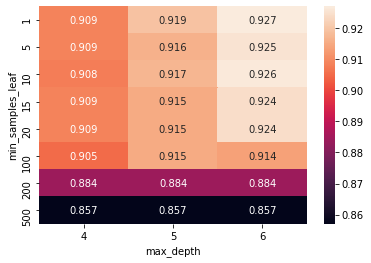

In [168]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

## Ensembles and random forest

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [171]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

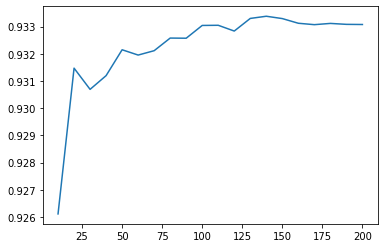

In [172]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [173]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [174]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

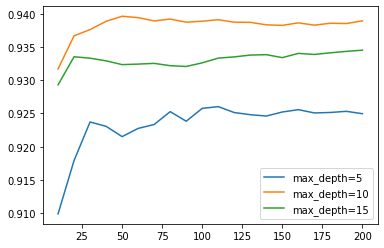

In [175]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [176]:
max_depth = 10

In [177]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [178]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

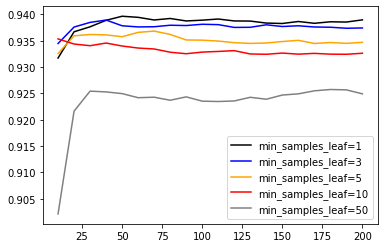

In [179]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [180]:
min_samples_leaf = 3

In [181]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

## Gradient boosting and XGBoost

In [182]:
import xgboost as xgb

In [183]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

c:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [184]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [185]:
y_pred = model.predict(dval)

In [186]:
roc_auc_score(y_val, y_pred)

0.9348314091991936

In [187]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [188]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [192]:
s = output.stdout
print(s)

[0]	train-auc:0.93065	val-auc:0.92766
[5]	train-auc:0.94001	val-auc:0.93455
[10]	train-auc:0.94495	val-auc:0.93435
[15]	train-auc:0.95324	val-auc:0.93950
[20]	train-auc:0.95676	val-auc:0.94037
[25]	train-auc:0.96374	val-auc:0.94760
[30]	train-auc:0.96735	val-auc:0.94500
[35]	train-auc:0.96962	val-auc:0.94526
[40]	train-auc:0.97140	val-auc:0.94630
[45]	train-auc:0.97243	val-auc:0.94581
[50]	train-auc:0.97382	val-auc:0.94670
[55]	train-auc:0.97438	val-auc:0.94620
[60]	train-auc:0.97489	val-auc:0.94668
[65]	train-auc:0.97534	val-auc:0.94596
[70]	train-auc:0.97580	val-auc:0.94529
[75]	train-auc:0.97605	val-auc:0.94558
[80]	train-auc:0.97666	val-auc:0.94549
[85]	train-auc:0.97688	val-auc:0.94556
[90]	train-auc:0.97713	val-auc:0.94509
[95]	train-auc:0.97759	val-auc:0.94484
[100]	train-auc:0.97792	val-auc:0.94446
[105]	train-auc:0.97828	val-auc:0.94485
[110]	train-auc:0.97855	val-auc:0.94493
[115]	train-auc:0.97868	val-auc:0.94495
[120]	train-auc:0.97884	val-auc:0.94537
[125]	train-auc:0.9791

In [193]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [194]:
df_score = parse_xgb_output(output)

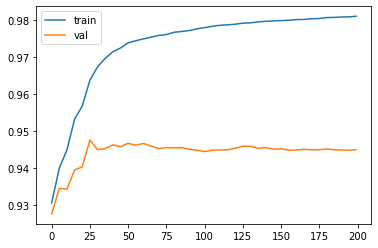

In [195]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

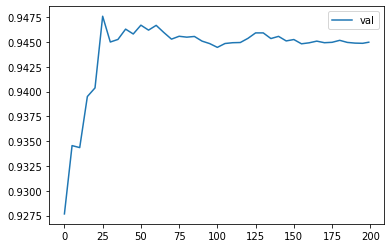

In [196]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

## Selecting final model

In [197]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [198]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9242715777899945

In [199]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [205]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9374141011544804

In [201]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [202]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9419610133773135